In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("country_vaccinations.csv") # using the new and updated vaccine dataset

In [4]:
df.head() # first 5 rows

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


# Calculating Percent Differences BEFORE Cleaning Daily Vaccinations

In [5]:
# create a list of each unique country
country_list = list(df['country'].unique())

In [6]:
# initialize a dataframe for percent difference of each country
percent_df = pd.DataFrame(columns=['country','percent_difference'])


for country in country_list:
    '''
    calculate percent_difference for each country and add to dataframe
    '''
    
    # filter dataframe to country in current loop
    country_df = df[df['country'] == country]
    
    # calculate sum of daily vaccinations and total vaccines
    daily_sum = country_df['daily_vaccinations'].sum()
    total_vaccines = country_df['total_vaccinations'].max()
    
    # calculate percent difference
    percent_diff = abs(daily_sum - total_vaccines) / total_vaccines
    percent_diff = round(percent_diff * 100, 2)
    
    # add country and calculation of percent difference to dataframe
    percent_df = percent_df.append({'country':country,'percent_difference':percent_diff},ignore_index = True)

In [7]:
percent_df.head() # first 5 rows

,country,percent_difference
0,Albania,15.64
1,Algeria,7.91
2,Andorra,21.97
3,Anguilla,3.92
4,Argentina,13.34


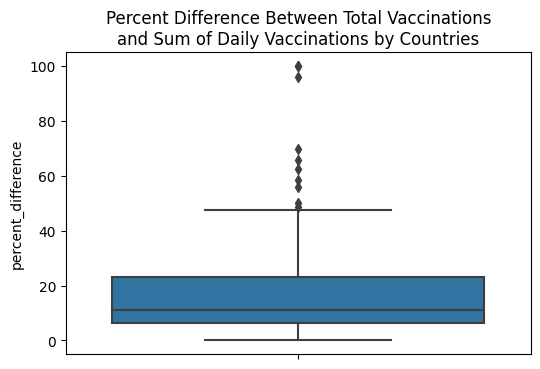

In [8]:
# create a boxplot for percent differences
plt.figure(figsize=(6,4),dpi=100)
plt.title('Percent Difference Between Total Vaccinations\nand Sum of Daily Vaccinations by Countries')

sns.boxplot(data=percent_df,y="percent_difference");

**Calculating 5-Number Summary**

In [15]:
quartiles = np.percentile(percent_df['percent_difference'],[25,50,75]) # obtain q1, q2 (median), q3 

In [25]:
df_min, df_max = percent_df['percent_difference'].min(), percent_df['percent_difference'].max() # obtain min and max

In [33]:
print('5-Number Summary:')
print('Min:\t',df_min)
print('Q1:\t',quartiles[0])
print('Median:\t',quartiles[1])
print('Q3:\t',quartiles[2])
print('Max:\t',df_max)

5-Number Summary:
Min:	 0.0
Q1:	 6.49
Median:	 10.98
Q3:	 23.19
Max:	 100.0


Compared to Toby's boxplot, this boxplot has a much higher percent difference (median of about 10%) than Toby's boxplot (median of only about 2%). We'll want to get our boxplot to a lower average percent difference.

# Calculating Percent Differences AFTER Cleaning Daily Vaccinations

Haven't decided on how to clean daily vaccines. Linear Regression is an option but don't know if it will work best.

Below, I look at a time graph of daily vaccinations for Albania.

In [211]:
country_df = df[df['country'] == 'Andorra'] # filter dataframe to the country of Alabania

In [212]:
date_df = country_df[['date','daily_vaccinations']].sort_values('date',ascending=True) # sort by ascending date

In [213]:
date_df.head() # first 5 rows

,date,daily_vaccinations
75,2021-01-25,NaN
76,2021-01-26,66.0
77,2021-01-27,66.0
78,2021-01-28,66.0
79,2021-01-29,66.0


In [214]:
date_df["date"] = pd.to_numeric(date_df["date"].str.replace('-',''))

In [215]:
date_df = date_df.dropna()

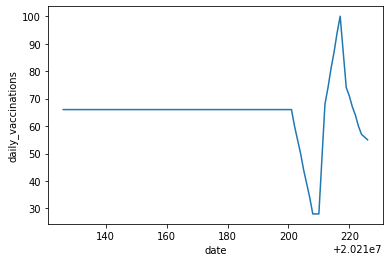

In [216]:
# plot line graph of daily vaccinations for Alabania
sns.lineplot(data=date_df,x='date',y='daily_vaccinations')
plt.ticklabel_format(style='plain',axis='y')

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

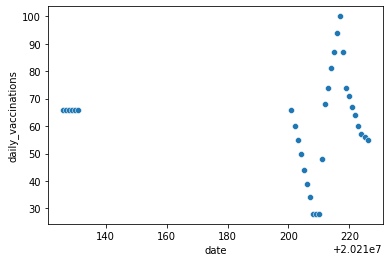

In [217]:
sns.scatterplot(data=date_df,x='date',y='daily_vaccinations')

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

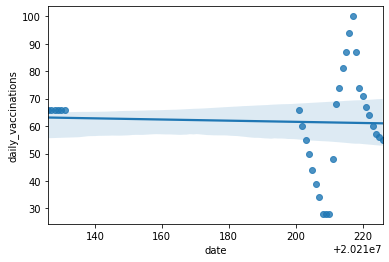

In [218]:
sns.regplot(data=date_df,x='date',y='daily_vaccinations')

# Calculating R and R^2 for each Country

Let's look at the coefficient of determinations for Alabania first, then expand to every country.

In [67]:
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats.stats import pearsonr

In [70]:
# correlation value r for Alabania
pearsonr(date_df['date'],date_df['daily_vaccinations'])[0]

0.6701478684172141

In [71]:
# r^2 value for Alabania
0.6701478684172141 ** 2

0.4490981655441357

**Calculating correlation coefficient r**

In [221]:
# ignore warnings (warning for missing values in for loop below)
import warnings
warnings.filterwarnings('ignore')

In [222]:
# initialize list for r coefficients
r_coeff_list = []

for country in country_list:
    '''
    calculate correlation coefficient r for each country
    '''
    
    # filter dataframe to country in current loop
    country_df = df[df['country'] == country]   
    
    # select only date and daily_vaccinations columns
    date_df = country_df[['date','daily_vaccinations']].sort_values('date',ascending=True) # sort by ascending date
    
    # convert date values to numeric
    date_df["date"] = pd.to_numeric(date_df["date"].str.replace('-',''))
    
    # drop any na values in the daily_vaccinations field
    date_df = date_df.dropna()
    
    # check if there are no daily_vaccinations data available
    if len(date_df['daily_vaccinations']) == 0:
        r_coeff_list.append('no_daily')
        continue
    
    # append data to dataframe
    r_coeff_list.append(pearsonr(date_df['date'],date_df['daily_vaccinations'])[0])

In [127]:
# create a dataframe containing r_coefficient for each country
d = {'country': country_list, 'r_coefficient': r_coeff_list}
r_df = pd.DataFrame(data=d)

In [128]:
r_df.head() # first 5 rows

,country,r_coefficient
0,Albania,0.670148
1,Algeria,0.902776
2,Andorra,-0.040080
3,Anguilla,-0.084690
4,Argentina,0.059406


In [129]:
print("Countries with no daily vaccinations data:",(r_df.r_coefficient == "no_daily").sum())
print("Countries with missing data:", r_df.r_coefficient.isna().sum())

Countries with no daily vaccinations data: 2
Countries with missing data: 10


In [130]:
# countries that have no data available for daily vaccinations
r_df[r_df['r_coefficient'] == "no_daily"]

,country,r_coefficient
46,Honduras,no_daily
97,Saint Helena,no_daily


In [131]:
# countries with missing r_coefficient values.
# The r_coefficients are missing because there are only 2 total_vaccination data available 
# for a particular country (data for total_vaccinations are on the first day, and on the last day)
r_df[r_df['r_coefficient'].isnull()]

,country,r_coefficient
11,Belarus,NaN
31,Egypt,NaN
42,Greenland,NaN
73,Monaco,NaN
74,Mongolia,NaN
76,Montserrat,NaN
88,Paraguay,NaN
90,Philippines,NaN
114,Trinidad and Tobago,NaN
116,Turks and Caicos Islands,NaN


For easier manipulation with r_df, I'll replace "no_daily" values with nan.

In [132]:
# replacing "no_daily" with nan
r_df['r_coefficient'] = r_df['r_coefficient'].replace("no_daily",np.nan)

In [135]:
# add column for r^2
r_df['r_squared'] = r_df['r_coefficient'] ** 2

In [163]:
r_df.head() # first 5 rows

,country,r_coefficient,r_squared
0,Albania,0.670148,0.449098
1,Algeria,0.902776,0.815005
2,Andorra,-0.040080,0.001606
3,Anguilla,-0.084690,0.007172
4,Argentina,0.059406,0.003529


In [180]:
# calculating proportion of countries within certain intervals
interval_one = ((r_df.r_squared > 0) & (r_df.r_squared <= 0.01)).sum() / 125
interval_two = ((r_df.r_squared > 0.01) & (r_df.r_squared <= 0.7)).sum() / 125
interval_three = ((r_df.r_squared > 0.7) & (r_df.r_squared <= 0.8)).sum() / 125
interval_four = ((r_df.r_squared > 0.8) & (r_df.r_squared <= 0.9)).sum() / 125
interval_five = ((r_df.r_squared > 0.9) & (r_df.r_squared <= 1.0)).sum() / 125

In [198]:
# print proportion of r^2 values in a certain interval
print('Not enough data:\t',(r_df.r_coefficient.isna().sum() / 125))
print('\t(0,0.01]:\t', interval_one)
print('\t(0.01,0.7]:\t', interval_two)
print('\t(0.7,0.8]:\t', interval_three)
print('\t(0.8,0.9]:\t', interval_four)
print('\t(0.9,1.0]:\t', interval_five)

Not enough data:	 0.096
	(0,0.01]:	 0.048
	(0.01,0.7]:	 0.648
	(0.7,0.8]:	 0.104
	(0.8,0.9]:	 0.088
	(0.9,1.0]:	 0.016
